### Project 3: Implementing a Simple Recurrent Neural Network (RNN)

#### Set up the environment

In [1]:
!pip install tensorflow numpy matplotlib pandas


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import libraries and load the dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(data.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


#### Data preprocessing

In [3]:
# Normalize the data
data_values = data['Temp'].values
data_values = data_values.reshape(-1, 1)
data_values = (data_values - np.mean(data_values)) / np.std(data_values)

# Split the data into training and testing sets
split_fraction = 0.8
train_split = int(len(data_values) * split_fraction)

train_data = data_values[:train_split]
test_data = data_values[train_split:]

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30
x_train, y_train = create_sequences(train_data, SEQ_LENGTH)
x_test, y_test = create_sequences(test_data, SEQ_LENGTH)

#### Build the RNN model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\14373\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [5]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6262 - val_loss: 0.2962
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3749 - val_loss: 0.2975
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3518 - val_loss: 0.2974
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3590 - val_loss: 0.2912
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3600 - val_loss: 0.2991
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3621 - val_loss: 0.2933
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3599 - val_loss: 0.2937
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3671 - val_loss: 0.2904
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3576 - val_loss: 0.3010
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3831 - val_loss: 0.2941
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3618 - val_loss: 0.2957
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3384 - val_lo

#### Evaluate the model

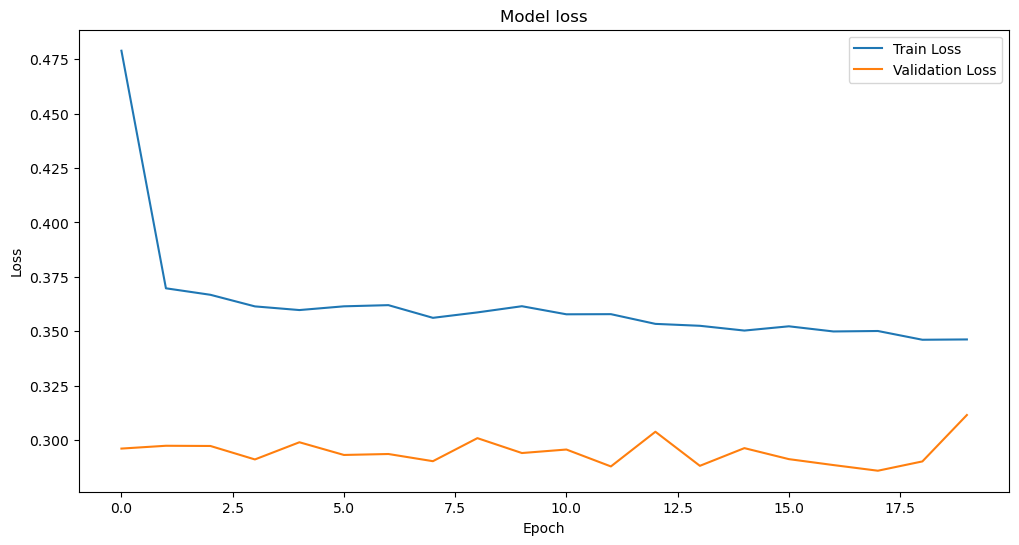

In [6]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

#### Make predictions

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


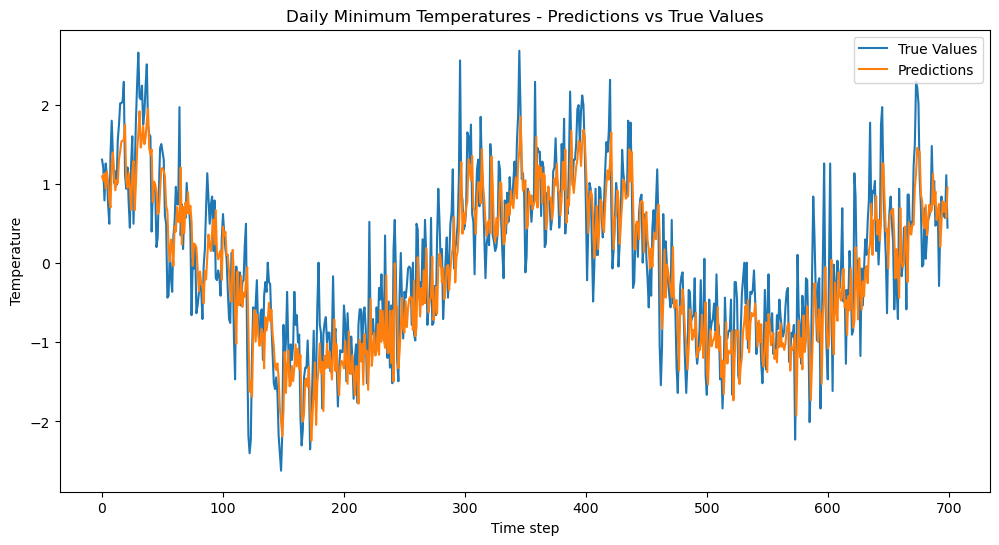

In [7]:
predictions = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Values')
plt.plot(np.arange(len(predictions)), predictions, label='Predictions')
plt.title('Daily Minimum Temperatures - Predictions vs True Values')
plt.ylabel('Temperature')
plt.xlabel('Time step')
plt.legend(loc='upper right')
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


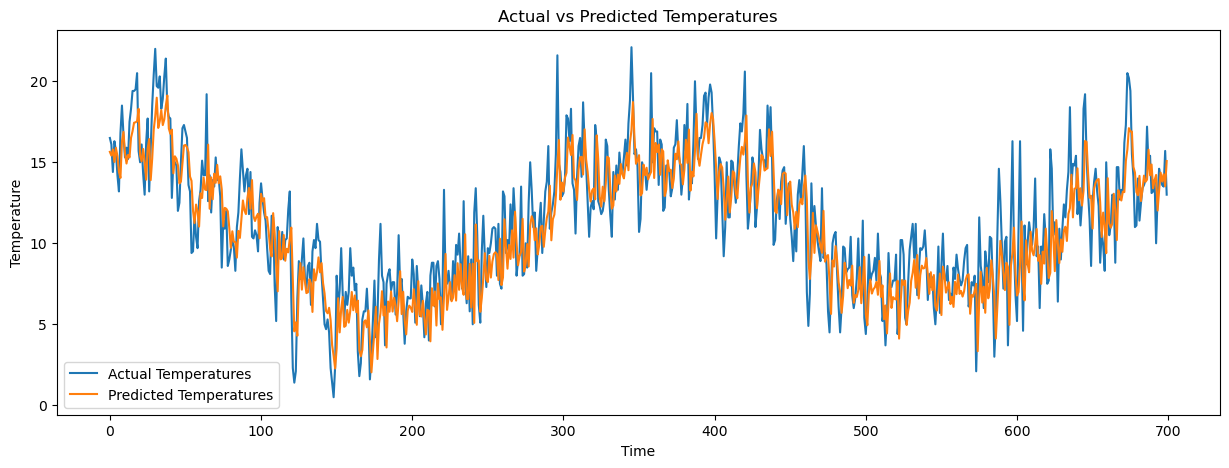

In [10]:
# Make predictions
predictions = model.predict(x_test)

# Inverse the normalization to get the actual temperature values
mean_temp = np.mean(data['Temp'].values)
std_temp = np.std(data['Temp'].values)

predictions = predictions * std_temp + mean_temp
y_test_actual = y_test * std_temp + mean_temp

# Flatten the arrays for plotting
predictions = predictions.flatten()
y_test_actual = y_test_actual.flatten()

# Plot the predictions against the actual values
plt.figure(figsize=(15,5))
plt.plot(y_test_actual, label='Actual Temperatures')
plt.plot(predictions, label='Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

#### Questions

#### 1. What is a Recurrent Neural Network (RNN)? Describe its key components and how they differ from those in a feedforward neural network.

A Recurrent Neural Network (RNN) is a type of neural network designed to recognize patterns in sequences of data such as time series, text, and speech. Unlike feedforward neural networks, RNNs have connections that loop back on themselves, allowing information to persist. The key components of an RNN include:

    Input Layer: Takes the sequential data.
    Hidden Layer: Contains neurons that take input from the current input data and the previous hidden state.
    Output Layer: Produces the prediction for the current input data.

In contrast to feedforward neural networks, where the data flows in one direction from input to output, RNNs have a feedback loop within the hidden layer that allows information to be carried across different time steps. This feedback loop is what enables RNNs to handle sequential data and maintain a memory of previous inputs.

#### 2. Explain the purpose of the recurrent connection in an RNN. How does it enable the network to handle sequential data?

The recurrent connection in an RNN is designed to capture dependencies in sequential data. This connection allows the hidden state at each time step to be a function of both the current input and the hidden state from the previous time step. This mechanism provides the network with a form of memory, enabling it to retain information about previous inputs in the sequence. This is essential for tasks like language modeling or time series prediction, where the current prediction can depend on previous data points.

#### 3. What are vanishing and exploding gradients, and how do they affect the training of RNNs?

Vanishing and exploding gradients are problems that can occur during the training of neural networks, particularly deep networks like RNNs:

    Vanishing Gradients: This occurs when the gradients used to update the network's weights become very small, effectively preventing the network from learning long-range dependencies. In RNNs, this means that information from earlier time steps has little to no effect on the learning of later time steps.

    Exploding Gradients: This occurs when the gradients become very large, leading to unstable updates and potential divergence of the network's parameters.

Both of these issues can severely impact the training of RNNs, making it difficult for the network to learn effectively.

#### 4. Describe the Long Short-Term Memory (LSTM) network and its key components. How does it address the issues of vanishing and exploding gradients?

The Long Short-Term Memory (LSTM) network is a type of RNN designed to address the vanishing and exploding gradient problems. LSTMs have a more complex architecture that allows them to maintain long-term dependencies. The key components of LSTMs include:

    Cell State: A memory unit that carries information across different time steps.
    Forget Gate: Decides what information should be discarded from the cell state.
    Input Gate: Determines which new information is to be added to the cell state.
    Output Gate: Controls the output of the cell state.

By using these gates, LSTMs can regulate the flow of information and maintain long-term dependencies more effectively than standard RNNs. This gating mechanism helps mitigate the issues of vanishing and exploding gradients, enabling more stable and effective learning over long sequences.

#### 5. What is the purpose of the GRU (Gated Recurrent Unit) in RNNs? Compare it with LSTM.

The Gated Recurrent Unit (GRU) is another type of RNN that is similar to LSTM but with a simpler architecture. The purpose of GRU is to maintain long-term dependencies in sequential data, similar to LSTM. However, GRU combines the forget and input gates into a single update gate and merges the cell state and hidden state.

Comparing GRU with LSTM:

    Simplicity: GRUs are simpler and have fewer parameters than LSTMs, which can make them faster to train.
    Performance: Both GRUs and LSTMs perform well on a variety of tasks, but their performance can vary depending on the specific application and dataset.
    Gating Mechanism: GRUs use an update gate and a reset gate, whereas LSTMs use forget, input, and output gates.

#### 6. Explain the role of the hidden state in an RNN. How is it updated during the training process?

The hidden state in an RNN acts as a memory that captures information from previous time steps. It is updated at each time step based on the current input and the hidden state from the previous time step. The update process involves:

    Computing the current hidden state: This is typically done using a non-linear function (e.g., tanh or ReLU) applied to the sum of the current input and the previous hidden state, both multiplied by their respective weight matrices.
    Backpropagation Through Time (BPTT): During training, the gradients are propagated back through each time step (hence "through time"), allowing the network to learn how to update the hidden state and the weights at each time step.

The hidden state is crucial for maintaining and updating the memory of the sequence as the network processes each new input.

#### 7. What are some common evaluation metrics used to assess the performance of an RNN on a sequential task, such as language modeling or time series forecasting?

Common evaluation metrics for assessing RNN performance include:

    Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
    Root Mean Squared Error (RMSE): The square root of the MSE, providing error in the same units as the target variable.
    Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.
    Accuracy: Often used for classification tasks to measure the proportion of correct predictions.
    Cross-Entropy Loss: Commonly used in language modeling and classification tasks, measuring the performance of the classification model whose output is a probability value between 0 and 1.

#### 8. How does data preprocessing impact the performance of RNNs? Provide examples of preprocessing steps for text and time series data.

Data preprocessing is critical for improving the performance of RNNs. Proper preprocessing can help the network learn more effectively and generalize better. Examples of preprocessing steps include:

    For Text Data:
        Tokenization: Splitting text into words or subwords.
        Normalization: Lowercasing text, removing punctuation, and stemming/lemmatization.
        Padding: Ensuring all sequences have the same length by adding padding tokens.

    For Time Series Data:
        Normalization/Standardization: Scaling data to have zero mean and unit variance.
        Resampling: Adjusting the frequency of the time series data.
        Creating Sequences: Splitting data into overlapping windows of a fixed length for training the RNN.

Proper preprocessing ensures that the data is in a format suitable for the RNN to process and learn from, leading to better model performance.

#### 9. What is sequence-to-sequence learning in the context of RNNs, and what are its applications?

Sequence-to-sequence (seq2seq) learning involves transforming one sequence into another using two RNNs: an encoder and a decoder. The encoder processes the input sequence and compresses the information into a context vector (hidden state), which the decoder then uses to generate the output sequence. Applications of seq2seq learning include:

    Machine Translation: Translating text from one language to another.
    Text Summarization: Condensing long documents into shorter summaries.
    Chatbots: Generating responses in conversational agents.
    Speech Recognition: Converting audio signals into text.

Seq2seq models are powerful for tasks where the input and output are both sequences, potentially of different lengths.

#### 10. How can RNNs be used for anomaly detection in time series data? Describe the general approach.

RNNs can be used for anomaly detection in time series data by learning the normal patterns in the data and identifying deviations from these patterns as anomalies. The general approach includes:

    Training Phase:
        Train an RNN on the normal time series data.
        The RNN learns to predict the next value in the sequence based on previous values.

    Detection Phase:
        Use the trained RNN to make predictions on new data.
        Calculate the prediction error (difference between predicted and actual values).
        Flag points with high prediction error as anomalies.

By training on normal data, the RNN learns what is expected, and significant deviations from these expectations can be detected as anomalies.